# quantinium Forage Task

by: Camilo Palacios

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data
df_purchase = pd.read_csv('QVI_purchase_behaviour.csv')
df_transac = pd.read_excel('QVI_transaction_data.xlsx')
# Convert Excel seria number to datetime
df_transac['date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df_transac['DATE'],unit='D')
print(df_transac.head(10))

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   
5  43604          4            4074    2982        57   
6  43601          4            4149    3333        16   
7  43601          4            4196    3539        24   
8  43332          5            5026    4525        42   
9  43330          7            7150    6900        52   

                                  PROD_NAME  PROD_QTY  TOT_SALES       date  
0    Natural Chip        Compny SeaSalt175g         2        6.0 2018-10-17  
1                  CCs Nacho Cheese    175g         3        6.3 2019-05-14  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9 2019-05-20  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       

In [32]:
# Create a column for only the product name
df_transac['product_base'] = (
    df_transac['PROD_NAME']
    .str.split(r'\s{2,}').str[0]                      #split by 2+ spaces and take the first part
    .str.replace(r'[^A-Za-z\s]', '', regex=True)      #remove special characters and numbers
    .str.replace(r'\s+', ' ', regex=True)             #remove leading/trailing spaces
    .str.strip()
)
print(df_transac.head(10))

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   
5  43604          4            4074    2982        57   
6  43601          4            4149    3333        16   
7  43601          4            4196    3539        24   
8  43332          5            5026    4525        42   
9  43330          7            7150    6900        52   

                                  PROD_NAME  PROD_QTY  TOT_SALES       date  \
0    Natural Chip        Compny SeaSalt175g         2        6.0 2018-10-17   
1                  CCs Nacho Cheese    175g         3        6.3 2019-05-14   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9 2019-05-20   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5   

In [33]:
# Count the times a word is repeated
products = df_transac['product_base'].str.split().explode()
count_prod = products.value_counts().reset_index()
count_prod.columns = ['word','count']
print(count_prod.head(20))

         word  count
0           g  76539
1      Kettle  41288
2       Chips  34427
3      Smiths  28860
4    Pringles  25102
5     Doritos  24962
6     Crinkle  23960
7        Corn  20554
8      Cheese  20001
9         Cut  19140
10       Salt  18900
11       Chip  18645
12      Thins  14075
13        Sea  12676
14       Sour  12366
15      Salsa  12245
16        RRD  11894
17  Infuzions  11057
18   Original  10812
19     Chilli  10728


In [34]:
# Remove products that are not chips (salsa)
df_chips = df_transac[~df_transac['PROD_NAME'].str.contains('salsa', case = False, regex = True)]
print(df_chips.sort_values(by='PROD_QTY', ascending=False).head(10))
# Remove customer with outlier values
df_chips = df_chips[df_chips['LYLTY_CARD_NBR'] != 226000]

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69763   43605        226          226000  226210         4   
69762   43331        226          226000  226201         4   
135225  43600         46           46296   42138        81   
69523   43600         71           71142   69852        96   
69502   43330         55           55144   49328        44   
69496   43327         49           49303   45789        14   
69486   43601         45           45006   40460        37   
69483   43327         43           43126   39445        25   
69474   43330         33           33138   30332        68   
69472   43329         32           32193   29196       110   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
69763           Dorito Corn Chp     Supreme 380g       200      650.0   
69762           Dorito Corn Chp     Supreme 380g       200      650.0   
135225           Pringles Original   Crisps 134g         5       18.5   
69523             WW Orig

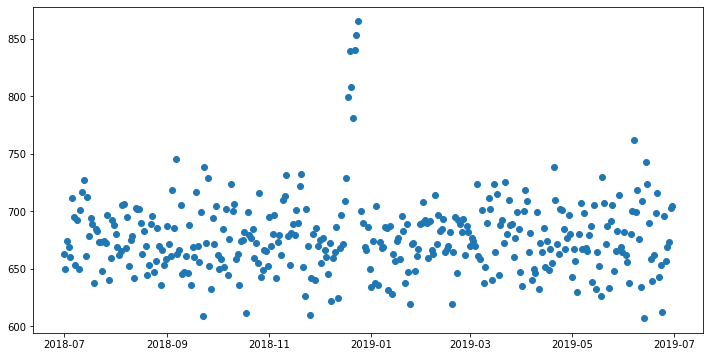

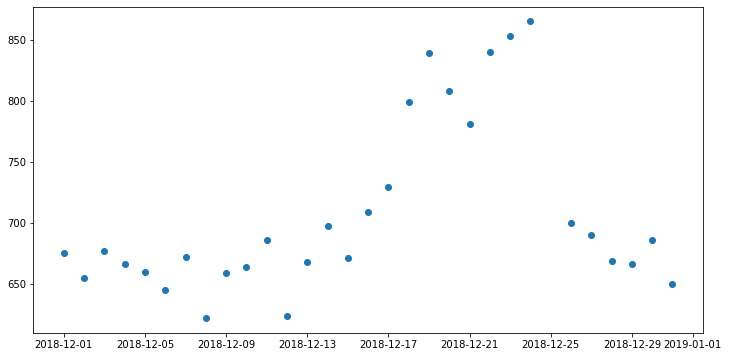

In [35]:
# Count number of transaction per date
transaction_per_date= df_chips.groupby('date').size().reset_index(name='num_transactions')
# Plot number of transaction per date
plt.figure(figsize=(12,6))
plt.scatter(transaction_per_date['date'],transaction_per_date['num_transactions'])
plt.show()
# Isolate sales in december
sales_dec = transaction_per_date[transaction_per_date['date'].dt.month==12]
plt.figure(figsize=(12,6))
plt.scatter(sales_dec['date'],sales_dec['num_transactions'])
plt.show()
# No sales on dec-25

<function matplotlib.pyplot.show(close=None, block=None)>

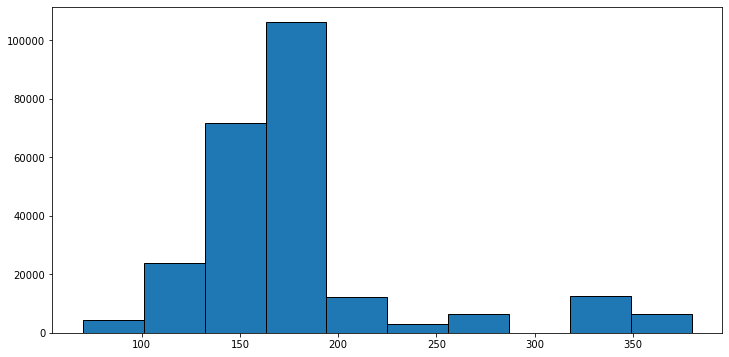

In [36]:
# Get products size
df_chips['PACK_SIZE']=df_chips['PROD_NAME'].str.extract(r'(\d+)').astype(float)
# Create histogram for size distrubution
plt.figure(figsize=(12,6))
counts,bins,patches = plt.hist(df_chips['PACK_SIZE'].dropna(), bins=10, edgecolor='black')
plt.show

In [37]:
# Group by brand names
df_chips['BRAND']= df_chips['PROD_NAME'].str.split().str[0]
brand_count = df_chips['BRAND'].value_counts().reset_index()
brand_count.columns = ['BRAND','count']
print(brand_count)

# Match repeated names
brand_mapping = {
    'rrd':'Red',
    'infzns':'Infuzion',
    'smith':'Smiths',
    'snbts':'Sunbites',
    'grain':'GrnWves',
    'woolworths':'WW',
    'dorito':'Doritos'
}
df_chips['BRAND']=df_chips['BRAND'].str.lower().replace(brand_mapping)
df_chips['BRAND']=df_chips['BRAND'].str.title()

brand_count = df_chips['BRAND'].value_counts().reset_index()
brand_count.columns = ['BRAND','count']
print(brand_count)

         BRAND  count
0       Kettle  41288
1       Smiths  27390
2     Pringles  25102
3      Doritos  22041
4        Thins  14075
5          RRD  11894
6    Infuzions  11057
7           WW  10320
8         Cobs   9693
9     Tostitos   9471
10    Twisties   9454
11    Tyrrells   6442
12       Grain   6272
13     Natural   6050
14    Cheezels   4603
15         CCs   4551
16         Red   4427
17      Dorito   3183
18      Infzns   3144
19       Smith   2963
20     Cheetos   2927
21       Snbts   1576
22      Burger   1564
23  Woolworths   1516
24     GrnWves   1468
25    Sunbites   1432
26         NCC   1419
27      French   1418
        BRAND  count
0      Kettle  41288
1      Smiths  30353
2     Doritos  25224
3    Pringles  25102
4         Red  16321
5       Thins  14075
6          Ww  11836
7   Infuzions  11057
8        Cobs   9693
9    Tostitos   9471
10   Twisties   9454
11    Grnwves   7740
12   Tyrrells   6442
13    Natural   6050
14   Cheezels   4603
15        Ccs   4551
16   

In [38]:
#####################  CUSTOMER DATA  ########################
df_purchase['AGE_GRP']=df_purchase['LIFESTAGE'].str.split().str[0]
df_purchase['CUST_TYP']=df_purchase['LIFESTAGE'].str.split().str[-1]
print(df_purchase.head(10))
age_grp=df_purchase['AGE_GRP'].value_counts().reset_index()
age_grp.columns=['GROUP','count']
print(age_grp)
cust_typ=df_purchase['CUST_TYP'].value_counts().reset_index()
cust_typ.columns=['CUST_TYP','count']
print(cust_typ)
category=df_purchase['PREMIUM_CUSTOMER'].value_counts().reset_index()
category.columns=['Category','count']
print(category)

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER AGE_GRP  \
0            1000   YOUNG SINGLES/COUPLES          Premium   YOUNG   
1            1002   YOUNG SINGLES/COUPLES       Mainstream   YOUNG   
2            1003          YOUNG FAMILIES           Budget   YOUNG   
3            1004   OLDER SINGLES/COUPLES       Mainstream   OLDER   
4            1005  MIDAGE SINGLES/COUPLES       Mainstream  MIDAGE   
5            1007   YOUNG SINGLES/COUPLES           Budget   YOUNG   
6            1009            NEW FAMILIES          Premium     NEW   
7            1010   YOUNG SINGLES/COUPLES       Mainstream   YOUNG   
8            1011   OLDER SINGLES/COUPLES       Mainstream   OLDER   
9            1012          OLDER FAMILIES       Mainstream   OLDER   

          CUST_TYP  
0  SINGLES/COUPLES  
1  SINGLES/COUPLES  
2         FAMILIES  
3  SINGLES/COUPLES  
4  SINGLES/COUPLES  
5  SINGLES/COUPLES  
6         FAMILIES  
7  SINGLES/COUPLES  
8  SINGLES/COUPLES  
9         FAMILIES 

In [39]:
# Merge both dataframes

df_chips = df_chips.merge(
    df_purchase[['LYLTY_CARD_NBR','AGE_GRP','CUST_TYP','PREMIUM_CUSTOMER']],
    on='LYLTY_CARD_NBR',
    how='left'
)
print(df_chips.head(10))
#Check if every value had a match
df_chips[['AGE_GRP','CUST_TYP','PREMIUM_CUSTOMER']].isna().any(axis=1).sum
#Save dataframe as .csv file
df_chips.to_csv('df_chips.csv', index=False)

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   
5  43601          4            4149    3333        16   
6  43601          4            4196    3539        24   
7  43332          5            5026    4525        42   
8  43330          7            7150    6900        52   
9  43602          7            7215    7176        16   

                                  PROD_NAME  PROD_QTY  TOT_SALES       date  \
0    Natural Chip        Compny SeaSalt175g         2        6.0 2018-10-17   
1                  CCs Nacho Cheese    175g         3        6.3 2019-05-14   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9 2019-05-20   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5   

In [40]:
# Who spends more on chips by lifestyle (AGE)
total_sales_by_age = df_chips.groupby('AGE_GRP')['TOT_SALES'].sum().reset_index()
print(total_sales_by_age)

# Who spends more on chips by customer type
total_sales_by_cust = df_chips.groupby('CUST_TYP')['TOT_SALES'].sum().reset_index()
print(total_sales_by_cust)

# Who spends more on chips by category (Premium)
total_sales_by_cat = df_chips.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
print(total_sales_by_cat)

# How many customers are in each segment
age_grp=df_purchase['AGE_GRP'].value_counts().reset_index()
print(age_grp)
cust_typ=df_purchase['CUST_TYP'].value_counts().reset_index()
print(cust_typ)
prem_cat=df_purchase['PREMIUM_CUSTOMER'].value_counts().reset_index()
print(prem_cat)

#How many chips are bougth per segment
age_chips=df_chips.groupby('AGE_GRP')['PROD_QTY'].sum().reset_index()
print(age_chips)
cust_typ_chips=df_chips.groupby('CUST_TYP')['PROD_QTY'].sum().reset_index()
print(cust_typ_chips)
prem_chips=df_chips.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].sum().reset_index()
print(prem_chips)

#How many chips are bougth per segment
age_chips_price=df_chips.groupby('AGE_GRP')['TOT_SALES'].mean().reset_index()
print(age_chips_price)
cust_typ_chips_price=df_chips.groupby('CUST_TYP')['TOT_SALES'].mean().reset_index()
print(cust_typ_chips_price)
prem_chips_price=df_chips.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean().reset_index()
print(prem_chips_price)




    AGE_GRP  TOT_SALES
0    MIDAGE  172523.80
1       NEW   47347.95
2     OLDER  704539.55
3  RETIREES  342381.90
4     YOUNG  538384.50
          CUST_TYP  TOT_SALES
0         FAMILIES  670495.75
1         RETIREES  342381.90
2  SINGLES/COUPLES  792300.05
  PREMIUM_CUSTOMER  TOT_SALES
0           Budget  631406.85
1       Mainstream  700865.40
2          Premium  472905.45
      index  AGE_GRP
0     OLDER    24389
1     YOUNG    23619
2  RETIREES    14805
3    MIDAGE     7275
4       NEW     2549
             index  CUST_TYP
0  SINGLES/COUPLES     36325
1         FAMILIES     21507
2         RETIREES     14805
        index  PREMIUM_CUSTOMER
0  Mainstream             29245
1      Budget             24470
2     Premium             18922
    AGE_GRP  PROD_QTY
0    MIDAGE     44496
1       NEW     12070
2     OLDER    185081
3  RETIREES     87875
4     YOUNG    140877
          CUST_TYP  PROD_QTY
0         FAMILIES    178543
1         RETIREES     87875
2  SINGLES/COUPLES    203981
  PR

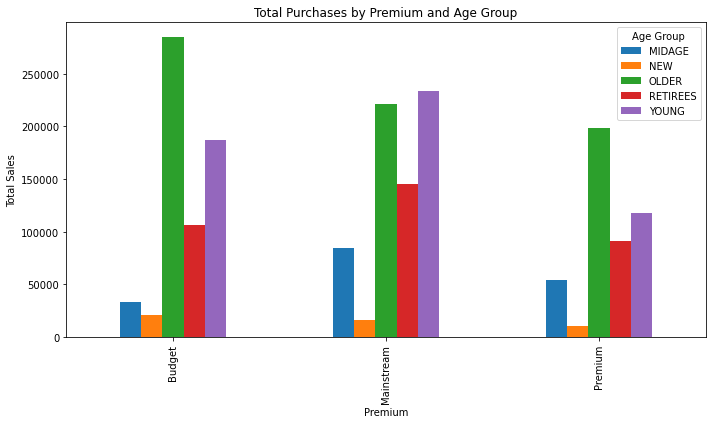

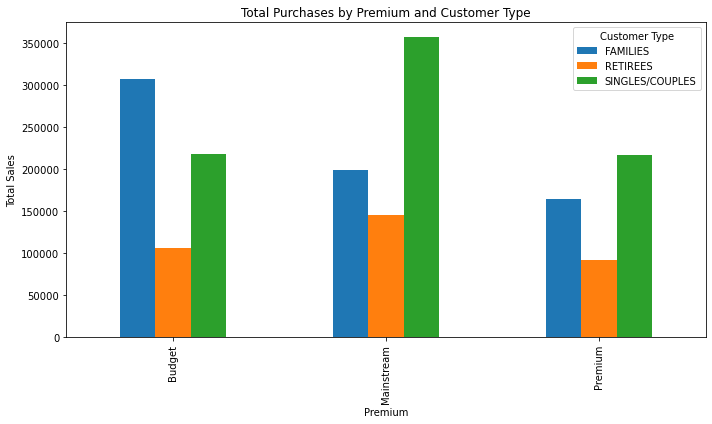

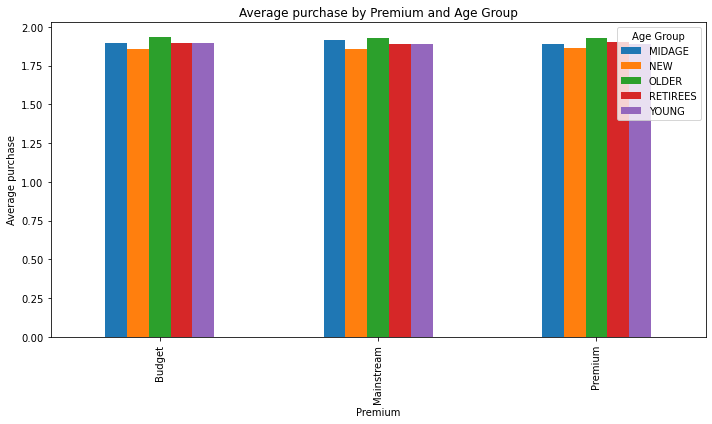

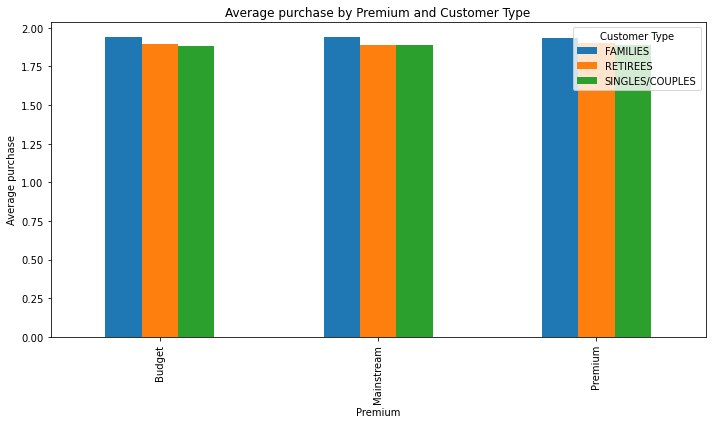

In [41]:
#Plot total sales by premium splitted by age and customer type
groupby_age=df_chips.groupby(['PREMIUM_CUSTOMER','AGE_GRP'])['TOT_SALES'].sum().reset_index()
pivot_t1 = groupby_age.pivot(index='PREMIUM_CUSTOMER',columns='AGE_GRP', values= 'TOT_SALES')
groupby_cust=df_chips.groupby(['PREMIUM_CUSTOMER','CUST_TYP'])['TOT_SALES'].sum().reset_index()
pivot_t2 = groupby_cust.pivot(index='PREMIUM_CUSTOMER',columns='CUST_TYP', values= 'TOT_SALES')


pivot_t1.plot(kind='bar', figsize=(10,6))
plt.title('Total Purchases by Premium and Age Group')
plt.xlabel('Premium')
plt.ylabel('Total Sales')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

pivot_t2.plot(kind='bar', figsize=(10,6))
plt.title('Total Purchases by Premium and Customer Type')
plt.xlabel('Premium')
plt.ylabel('Total Sales')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

#Plot average number of units by premium splitted by age and customer type
groupby_age=df_chips.groupby(['PREMIUM_CUSTOMER','AGE_GRP'])['PROD_QTY'].mean().reset_index()
pivot_t1 = groupby_age.pivot(index='PREMIUM_CUSTOMER',columns='AGE_GRP', values= 'PROD_QTY')
groupby_cust=df_chips.groupby(['PREMIUM_CUSTOMER','CUST_TYP'])['PROD_QTY'].mean().reset_index()
pivot_t2 = groupby_cust.pivot(index='PREMIUM_CUSTOMER',columns='CUST_TYP', values= 'PROD_QTY')


pivot_t1.plot(kind='bar', figsize=(10,6))
plt.title('Average purchase by Premium and Age Group')
plt.xlabel('Premium')
plt.ylabel('Average purchase')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

pivot_t2.plot(kind='bar', figsize=(10,6))
plt.title('Average purchase by Premium and Customer Type')
plt.xlabel('Premium')
plt.ylabel('Average purchase')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

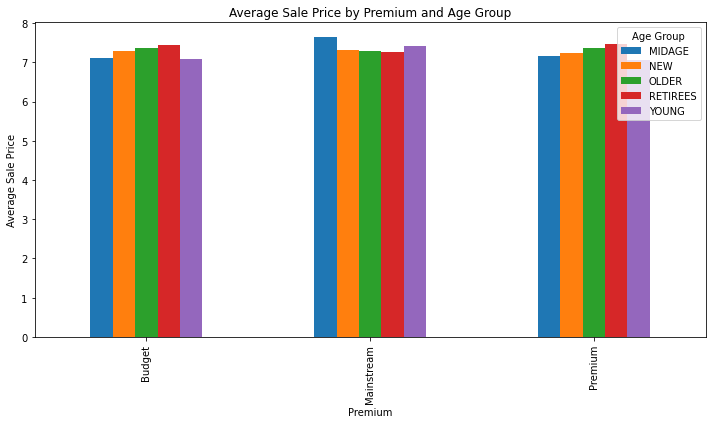

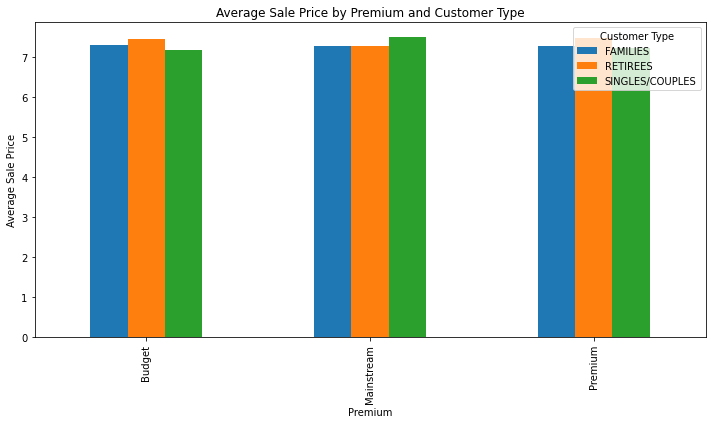

Premium V Budget:  Ttest_indResult(statistic=0.23016446447243324, pvalue=0.8179677284329078)
Premium V Mainstream:  Ttest_indResult(statistic=-22.63024340959606, pvalue=2.3113464216255553e-110)
Mainstream V Budget:  Ttest_indResult(statistic=26.53627386286189, pvalue=9.217233450014853e-152)


In [42]:
#Plot average sale price by premium splitted by age and customer type
groupby_age=df_chips.groupby(['PREMIUM_CUSTOMER','AGE_GRP'])['TOT_SALES'].mean().reset_index()
pivot_t1 = groupby_age.pivot(index='PREMIUM_CUSTOMER',columns='AGE_GRP', values= 'TOT_SALES')
groupby_cust=df_chips.groupby(['PREMIUM_CUSTOMER','CUST_TYP'])['TOT_SALES'].mean().reset_index()
pivot_t2 = groupby_cust.pivot(index='PREMIUM_CUSTOMER',columns='CUST_TYP', values= 'TOT_SALES')


pivot_t1.plot(kind='bar', figsize=(10,6))
plt.title('Average Sale Price by Premium and Age Group')
plt.xlabel('Premium')
plt.ylabel('Average Sale Price')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

pivot_t2.plot(kind='bar', figsize=(10,6))
plt.title('Average Sale Price by Premium and Customer Type')
plt.xlabel('Premium')
plt.ylabel('Average Sale Price')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

#Perfomt t-test for young single/couples fro each premiu category
subset=df_chips[(df_chips['AGE_GRP']=='YOUNG')&(df_chips['CUST_TYP']=='SINGLES/COUPLES')]
premium=subset[subset['PREMIUM_CUSTOMER']=='Premium']
budget=subset[subset['PREMIUM_CUSTOMER']=='Budget']
mainstream=subset[subset['PREMIUM_CUSTOMER']=='Mainstream']

from scipy.stats import ttest_ind
#Premium V Budget
t1=ttest_ind(premium['TOT_SALES'], budget['TOT_SALES'], equal_var=False)
#Premium V Mainstream
t2=ttest_ind(premium['TOT_SALES'], mainstream['TOT_SALES'], equal_var=False)
#Mainstream V Budget
t3=ttest_ind(mainstream['TOT_SALES'], budget['TOT_SALES'], equal_var=False)

print('Premium V Budget: ',t1)
print('Premium V Mainstream: ',t2)
print('Mainstream V Budget: ',t3)


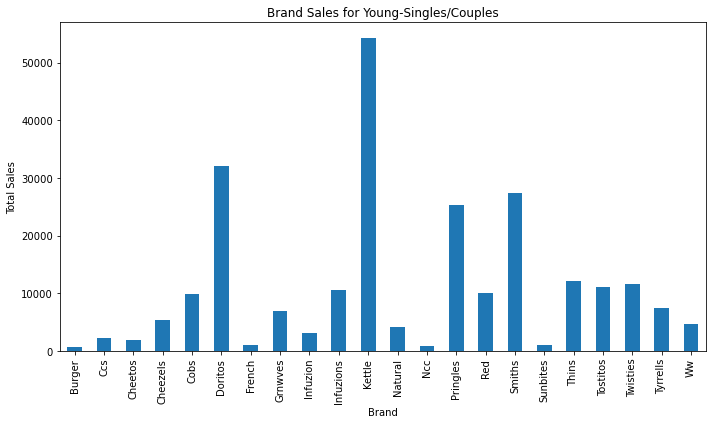

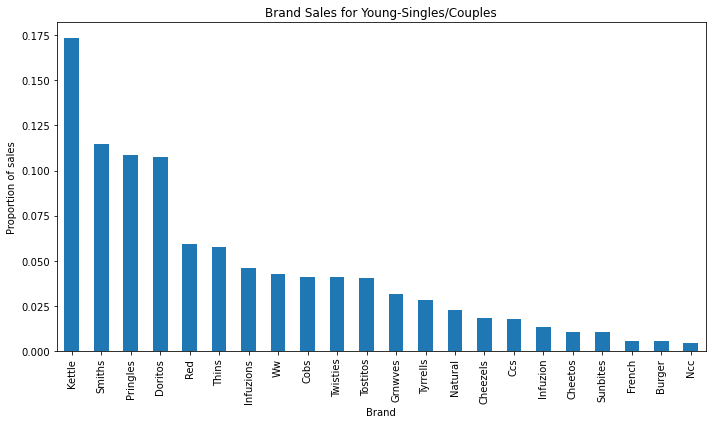

Tyrrells     1.090180
Twisties     1.084233
Pringles     1.077384
Doritos      1.059722
Tostitos     1.057475
Cobs         1.053887
Infuzion     1.046272
Kettle       1.042856
Infuzions    1.031192
Thins        1.012756
Grnwves      1.011363
French       0.992773
Cheezels     0.964126
Ccs          0.940265
Smiths       0.921561
Natural      0.912095
Cheetos      0.889575
Red          0.878745
Ww           0.872418
Sunbites     0.854246
Burger       0.804427
Ncc          0.784823
Name: BRAND, dtype: float64


In [53]:
#Plot brand sales for young singles/couples
groupby_brand=subset.groupby(['BRAND'])['TOT_SALES'].sum().reset_index()
groupby_brand.set_index('BRAND', inplace=True)

groupby_brand.plot(kind='bar', figsize=(10,6), legend=False)
plt.title('Brand Sales for Young-Singles/Couples')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

groupby_brand=subset['BRAND'].value_counts(normalize=True)


groupby_brand.plot(kind='bar', figsize=(10,6), legend=False)
plt.title('Brand Sales for Young-Singles/Couples')
plt.xlabel('Brand')
plt.ylabel('Proportion of sales')
plt.tight_layout()
plt.show()

# Compare proportion of sales to other groups
other_subset = df_chips[~((df_chips['AGE_GRP']=='YOUNG')&(df_chips['CUST_TYP']=='SINGLES/COUPLES'))]
groupby_brand_others=other_subset['BRAND'].value_counts(normalize=True)
affinity =(groupby_brand/groupby_brand_others).dropna().sort_values(ascending=False)
print(affinity)

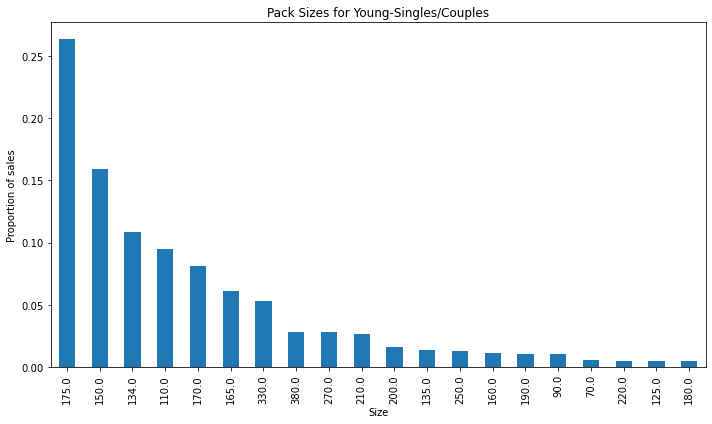

270.0    1.111223
380.0    1.095370
134.0    1.077384
210.0    1.067128
110.0    1.054953
330.0    1.051822
250.0    1.031286
135.0    1.009335
170.0    0.999964
165.0    0.984090
175.0    0.976352
150.0    0.972491
160.0    0.941250
190.0    0.880159
125.0    0.868185
70.0     0.860370
200.0    0.856381
90.0     0.854246
220.0    0.804427
180.0    0.782360
Name: PACK_SIZE, dtype: float64


In [55]:
#Which size do they preffer
groupby_size=subset['PACK_SIZE'].value_counts(normalize=True)


groupby_size.plot(kind='bar', figsize=(10,6), legend=False)
plt.title('Pack Sizes for Young-Singles/Couples')
plt.xlabel('Size')
plt.ylabel('Proportion of sales')
plt.tight_layout()
plt.show()

# Compare proportion of sales to other groups
other_subset = df_chips[~((df_chips['AGE_GRP']=='YOUNG')&(df_chips['CUST_TYP']=='SINGLES/COUPLES'))]
groupby_size_others=other_subset['PACK_SIZE'].value_counts(normalize=True)
affinity =(groupby_size/groupby_size_others).dropna().sort_values(ascending=False)
print(affinity)
